<a href="https://colab.research.google.com/github/android-kunjapppan/Fast-AI/blob/master/Fastai_Lec1_Intro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from fastai2.vision.all import *
path = untar_data(URLs.PETS)/'images'

def is_cat(x): 
  return x[0].isupper()

dls = ImageDataLoaders.from_name_func(path,get_image_files(path),
                                      valid_pct=0.2,seed=42,
                                      label_func= is_cat,item_tfms = Resize(224))

learn = cnn_learner(dls,resnet34,metrics=error_rate)
learn.fine_tune(1)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


epoch,train_loss,valid_loss,error_rate,time
0,0.166060,0.022008,0.006766,00:41


epoch,train_loss,valid_loss,error_rate,time
0,0.064140,0.030588,0.008119,00:43


# Uploading Files

In [11]:
from google.colab import files
files.upload()

Saving download.jpg to download.jpg


{'download.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00\x84\x00\t\x06\x07\x13\x13\x12\x15\x13\x13\x13\x15\x16\x15\x17\x18\x18\x18\x17\x18\x18\x18\x17\x16\x18\x16\x15\x18\x17\x17\x17\x18\x17\x18\x17\x18\x1d( \x18\x1a%\x1d\x15\x15!1!%)+...\x17\x1f383-7(-.+\x01\n\n\n\x0e\r\x0e\x1a\x10\x10\x1a-%\x1f%--------------------------------------------------\xff\xc0\x00\x11\x08\x00\xe1\x00\xe1\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x02\x02\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x05\x03\x06\x00\x01\x02\x07\x08\xff\xc4\x00=\x10\x00\x01\x03\x02\x04\x03\x05\x05\x06\x05\x04\x03\x01\x00\x00\x00\x01\x00\x02\x03\x04\x11\x05!1A\x12Qa\x06\x13"q\x812\x91\xa1\xb1\xd1\x07#BR\xc1\xf0\x14\x15br\xe13\x82\xb2\xf1S\xa2\xc2\x92\xff\xc4\x00\x18\x01\x00\x03\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x00\x04\xff\xc4\x00"\x11\x01\x01\x00\x02\x03\x01\x01\x01\x00\x02\x03\x00\x00\x00\x00\x00\x00\x01\x02\x11\x03!1\x12A

In [12]:
img = PILImage.create('/content/download.jpg')

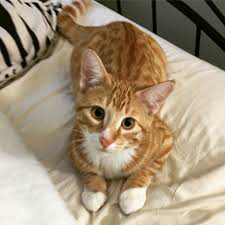

In [13]:
img

# Predicting whether its a cat or not?

In [14]:
is_cat,x,probs = learn.predict(img)
print("cat?",is_cat)
print("Probability",probs)
print(x)

cat? True
Probability tensor([2.1470e-06, 1.0000e+00])
tensor(1)


# Machine Learning:
  The training of programs developed by allowing a computer to learn from its experience, rather than through manually coding the individual steps.

# Limitations:
* model cannot be created without data.
* A model can only learn to operate on the patterns seen in the input data used to train it.
* This learning Approach only creates predictions, not recommend actions.
* It's not enough to just have examples of input data, we need labels for that data too

# Segmentation:

In [19]:
path = untar_data(URLs.CAMVID_TINY)
dls = SegmentationDataLoaders.from_label_func(
    path,bs =8, fnames = get_image_files(path/"images"),
    label_func = lambda o: path/'labels'/f'{o.stem}_P{o.suffix}',
    codes = np.loadtxt(path/'codes.txt',dtype = str)
)

learn = unet_learner(dls,resnet34)
learn.fine_tune(6)

epoch,train_loss,valid_loss,time
0,2.636153,2.480825,00:02


epoch,train_loss,valid_loss,time
0,1.776359,1.528229,00:01
1,1.572099,1.641083,00:01
2,1.453043,1.187868,00:01
3,1.300767,0.987808,00:01
4,1.167763,0.854270,00:01
5,1.062468,0.832897,00:01


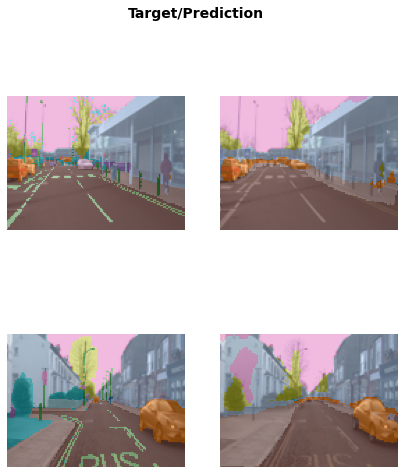

In [20]:
learn.show_results(max_n =6,figsize=(7,8))

# NLP

In [24]:
from fastai2.text.all import *

dls = TextDataLoaders.from_folder(untar_data(URLs.IMDB),valid='test')

learn = text_classifier_learner(dls,AWD_LSTM,drop_mult =0.5,metrics = accuracy)
learn.fine_tune(2,1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,0.606373,0.406610,0.812680,02:17


epoch,train_loss,valid_loss,accuracy,time
0,0.298676,0.231553,0.906400,04:11
1,0.235640,0.201547,0.921760,04:15


In [25]:
learn.predict("I really liked that movie")

('pos', tensor(1), tensor([0.0107, 0.9893]))

# Tabular Data

In [26]:
from fastai2.tabular.all import *
path = untar_data(URLs.ADULT_SAMPLE)

dls = TabularDataLoaders.from_csv(path/'adult.csv', path=path, y_names="salary",
    cat_names = ['workclass', 'education', 'marital-status', 'occupation',
                 'relationship', 'race'],
    cont_names = ['age', 'fnlwgt', 'education-num'],
    procs = [Categorify, FillMissing, Normalize])

learn = tabular_learner(dls, metrics=accuracy)

In [27]:
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,accuracy,time
0,0.364421,0.361606,0.833077,00:05
1,0.359978,0.348484,0.839220,00:05
2,0.340640,0.344347,0.837531,00:05


# Collaborative Filtering

In [28]:
from fastai2.collab import *
path = untar_data(URLs.ML_SAMPLE)
dls = CollabDataLoaders.from_csv(path/'ratings.csv')
learn = collab_learner(dls, y_range=(0.5,5.5))
learn.fine_tune(10)

epoch,train_loss,valid_loss,time
0,1.523297,1.396691,00:00


epoch,train_loss,valid_loss,time
0,1.380812,1.339146,00:00
1,1.287091,1.159335,00:00
2,1.048348,0.845083,00:00
3,0.814880,0.692698,00:00
4,0.699208,0.651164,00:00
5,0.654038,0.639712,00:00
6,0.627288,0.633315,00:00
7,0.630578,0.631100,00:00
8,0.618479,0.630277,00:00
9,0.615546,0.630136,00:00


In [29]:
learn.show_results()

,userId,movieId,rating,rating_pred
0,28.0,53.0,1.0,3.066573
1,38.0,74.0,4.0,3.869362
2,10.0,100.0,5.0,3.915321
3,27.0,19.0,1.0,2.577526
4,74.0,28.0,3.0,3.335164
5,54.0,60.0,4.5,3.963652
6,97.0,46.0,5.0,3.570051
7,57.0,57.0,4.0,3.882738
8,49.0,88.0,5.0,4.581632
